In [36]:
import pandas as pd
df = pd.read_csv('student_clustering.csv')

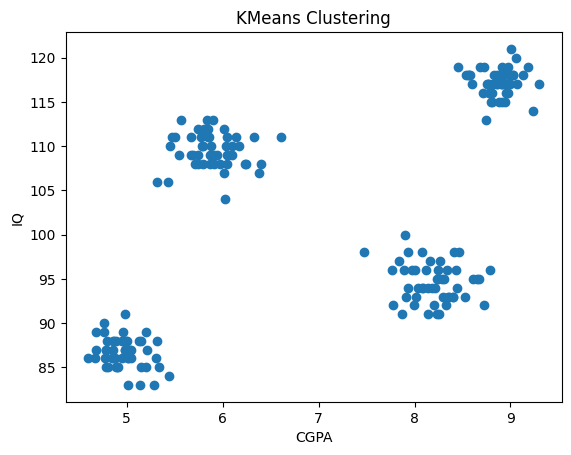

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])
plt.title('KMeans Clustering')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

inertia_values = []

for i in range(2,8):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    inertia_values.append(kmeans.inertia_)
    plt.scatter(df['cgpa'],df['iq'], c=labels, cmap='viridis', label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Cluster Centers')
    plt.title('KMeans Clustering')
    plt.xlabel('CGPA')
    plt.ylabel('IQ')
    plt.legend()
    plt.show()

In [ ]:
plt.plot(range(2,8), inertia_values, marker='+')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [42]:
km = KMeans(n_clusters=4, n_init=10)
y_means = km.fit_predict(df)
df['Cluster'] = y_means

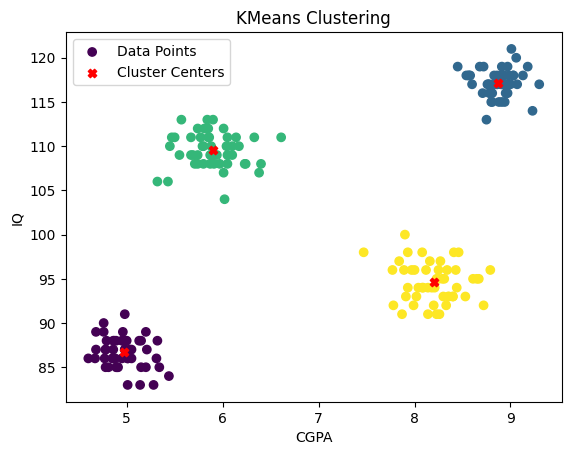

In [43]:
plt.scatter(df['cgpa'], df['iq'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', label='Cluster Centers')
plt.title('KMeans Clustering')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.show()

# K-Means on 2-D Data

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, n_features=2, centers=8, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Cluster Centers')
    plt.title('KMeans Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
plt.plot(range(2, 15), inertia_values, marker='+')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

# K-Means on 3-D Data

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,7):
    km = KMeans(n_clusters=i,n_init=10)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [ ]:
plt.plot(range(1, 7), wcss, marker='+')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [ ]:
km = KMeans(n_clusters=4, n_init=10)
y_pred = km.fit_predict(X)

In [ ]:
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()